-90.0 deg 0.0 deg 0.1 kpc 3125.0000000000005 GeV / cm3
-90.0 deg 0.0 deg 5.644444444444444 kpc 0.527917520850787 GeV / cm3
-90.0 deg 0.0 deg 11.188888888888888 kpc 0.07359005043602962 GeV / cm3
-90.0 deg 0.0 deg 16.733333333333334 kpc 0.022637657414816933 GeV / cm3
-90.0 deg 0.0 deg 22.27777777777778 kpc 0.009733251641864997 GeV / cm3
-90.0 deg 0.0 deg 27.822222222222223 kpc 0.005040876474554267 GeV / cm3
-90.0 deg 0.0 deg 33.36666666666667 kpc 0.0029396443658022174 GeV / cm3
-90.0 deg 0.0 deg 38.91111111111111 kpc 0.0018614078112975283 GeV / cm3
-90.0 deg 0.0 deg 44.455555555555556 kpc 0.0012521597586648153 GeV / cm3
-90.0 deg 0.0 deg 50.0 kpc 0.0008822664444662288 GeV / cm3
-90.0 deg 6.101694915254237 deg 0.1 kpc 3125.0000000000005 GeV / cm3
-90.0 deg 6.101694915254237 deg 5.644444444444444 kpc 0.527917520850787 GeV / cm3
-90.0 deg 6.101694915254237 deg 11.188888888888888 kpc 0.07359005043602962 GeV / cm3
-90.0 deg 6.101694915254237 deg 16.733333333333334 kpc 0.022637657414816933 GeV

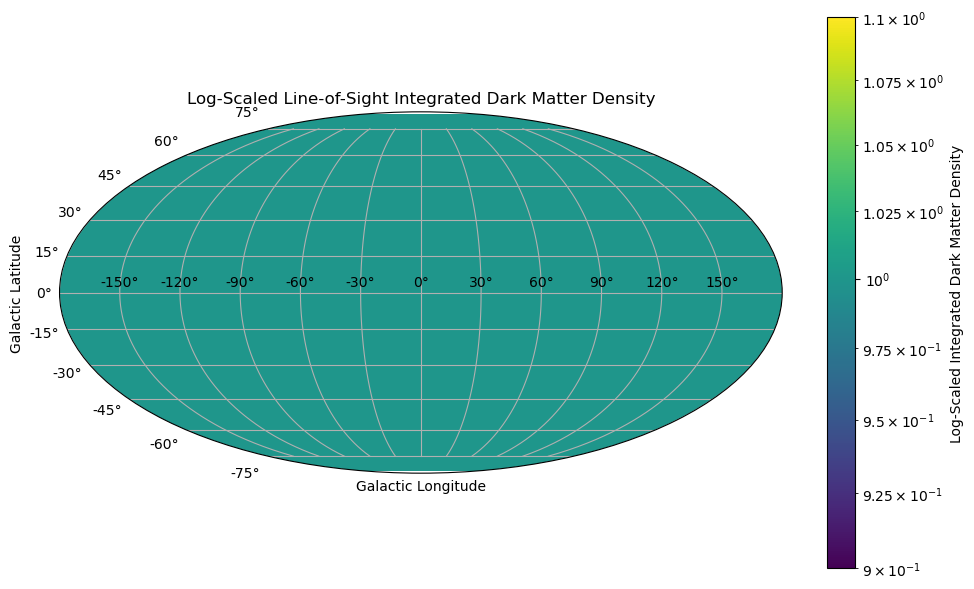

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u
from astropy.coordinates import SkyCoord
from galpy.potential import NFWPotential

# NFW Profile Parameters
rho_0 = 900 * u.GeV / u.cm**3  # Characteristic density
r_s = 0.5 * u.kpc  # Scale radius
#r_s = 1.0 * u.kpc  # Scale radius

# Function to compute NFW density at a given distance r
def nfw_density(r):
    return rho_0 / ((r / r_s) * (1 + r / r_s)**2) 

# Define the grid resolution for galactic longitude (l) and latitude (b)
num_lon = 60  # Number of longitude points
num_lat = 30  # Number of latitude points

# Create arrays of longitude and latitude in degrees
lon = np.linspace(0, 360, num_lon)  # Galactic longitude, l [0, 360]
lat = np.linspace(-90, 90, num_lat)  # Galactic latitude, b [-90, 90]

# Create a meshgrid for vectorized calculations
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Define the Sun's distance from the Galactic center
R_sun = 8.2 * u.kpc  # Distance from Galactic center to Sun

# Define maximum distance for line-of-sight integration
d_max = 50 * u.kpc  # You can adjust this to explore different distances
num_steps = 10  # Number of steps for integration
distances = np.linspace(0.1, d_max.value, num_steps) * u.kpc  # Avoid starting at 0 to prevent singularity

# Array to store the integrated density for each direction
density_integrated = np.zeros((num_lat, num_lon))

# Perform line-of-sight integration for each (lon, lat) direction
for i in range(num_lat):
    for j in range(num_lon):
        # Get the current Galactic longitude and latitude
        l = lon_grid[i, j] * u.deg
        b = lat_grid[i, j] * u.deg
        
        # Integrate along the line of sight
        density_sum = 0.0 * u.GeV / u.cm**3  # Initialize the summation with correct units
        
        for d in distances:
            # Define the galactic coordinates at the current distance along the line of sight
            galactic_coords = SkyCoord(l, b, distance=d)
            
            # Convert galactic coordinates to Cartesian coordinates
            x = galactic_coords.cartesian.x
            y = galactic_coords.cartesian.y
            z = galactic_coords.cartesian.z
            
            # Calculate the radial distance from the Galactic center
            r = np.sqrt(x**2 + y**2 + z**2)
            
            # Compute the dark matter density at this distance
            density = nfw_density(r)
            print(b,l,r,density)
            # Accumulate the density, weighted by the step size along the line of sight
            density_sum += density #* (d_max / num_steps)  # Riemann sum approximation of integral
        
        # Store the integrated density
        density_integrated[i, j] = density_sum.value  # Store as a dimensionless quantity for plotting

# Normalize the density for visualization purposes
density_integrated_normalized = density_integrated / np.max(density_integrated)

# Convert longitude from [0, 360] to [-180, 180] for Mollweide projection
lon_plot = lon_grid - 180
lon_rad = np.deg2rad(lon_plot)
lat_rad = np.deg2rad(lat_grid)

# Plot the line-of-sight integrated dark matter angular distribution in log scale
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection="mollweide")

# Use LogNorm for logarithmic scaling
c = ax.pcolormesh(lon_rad, lat_rad, density_integrated_normalized, cmap='viridis', norm=LogNorm(), shading='auto')

plt.colorbar(c, label='Log-Scaled Integrated Dark Matter Density')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')
ax.set_title('Log-Scaled Line-of-Sight Integrated Dark Matter Density')
ax.grid(True)
plt.tight_layout()
plt.show()


In [9]:
density_integrated

array([[20.67363384, 20.67363384, 20.67363384, ..., 20.67363384,
        20.67363384, 20.67363384],
       [20.67363384, 20.67363384, 20.67363384, ..., 20.67363384,
        20.67363384, 20.67363384],
       [20.67363384, 20.67363384, 20.67363384, ..., 20.67363384,
        20.67363384, 20.67363384],
       ...,
       [20.67363384, 20.67363384, 20.67363384, ..., 20.67363384,
        20.67363384, 20.67363384],
       [20.67363384, 20.67363384, 20.67363384, ..., 20.67363384,
        20.67363384, 20.67363384],
       [20.67363384, 20.67363384, 20.67363384, ..., 20.67363384,
        20.67363384, 20.67363384]])

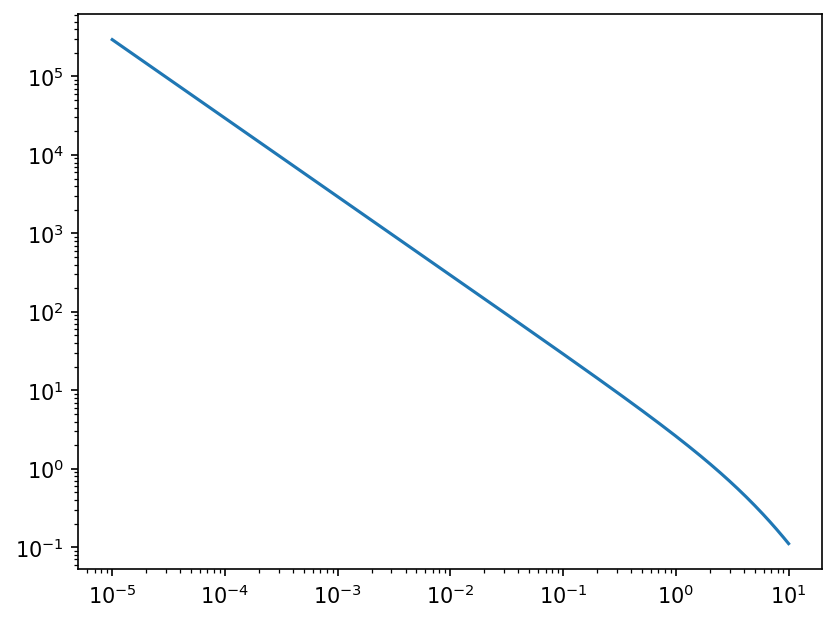

In [39]:
plt.figure(dpi=150)
r_test = np.logspace(-5,1,400)* u.kpc
plt.plot(r_test, nfw_density(r_test))
plt.yscale('log')
plt.xscale('log')
plt.show()

In [25]:
r_test =r_test * u.kpc

In [26]:
nfw_density(r_test)

<Quantity [4.60000000e-02, 1.97727823e-02, 1.03436486e-02, 6.09747614e-03,
           3.89860241e-03, 2.64458489e-03, 1.87672505e-03, 1.38008745e-03,
           1.04457082e-03, 8.09707069e-04, 6.40370380e-04, 5.15190389e-04,
           4.20650663e-04, 3.47914590e-04, 2.91037680e-04, 2.45920124e-04,
           2.09671657e-04, 1.80214680e-04, 1.56029562e-04, 1.35987283e-04,
           1.19237094e-04, 1.05129641e-04, 9.31634569e-05, 8.29470949e-05,
           7.41719602e-05, 6.65925463e-05, 6.00118824e-05, 5.42706949e-05,
           4.92392500e-05, 4.48111533e-05, 4.08985933e-05, 3.74286617e-05,
           3.43404837e-05, 3.15829625e-05, 2.91129947e-05, 2.68940485e-05,
           2.48950238e-05, 2.30893325e-05, 2.14541529e-05, 1.99698218e-05,
           1.86193356e-05, 1.73879400e-05, 1.62627906e-05, 1.52326702e-05,
           1.42877533e-05, 1.34194090e-05, 1.26200347e-05, 1.18829158e-05,
           1.12021075e-05, 1.05723331e-05, 9.98889872e-06, 9.44761892e-06,
           8.94475397e-06